<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>


# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
<a href="#item33">A. Build a baseline model (5 marks)</a>  
<a href="#item34">B. Normalize the data (5 marks)</a>  
<a href="#item35">C. Increate the number of epochs (5 marks)</a>  
<a href="#item36">D. Increase the number of hidden layers (5 marks)</a>  
</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:

1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Superplasticizer
6. Coarse Aggregate
7. Fine Aggregate

Let's download the data and read it into a <em>pandas</em> dataframe.


In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have.


In [4]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [7]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [8]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [9]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [10]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to _n_cols_ since we will need this number when building our network.


In [11]:
n_cols = predictors_norm.shape[1] # number of predictors

In [37]:
import keras;

In [13]:
from keras.models import Sequential
from keras.layers import Dense

<a id='item33'></a>


# A. Build a baseline model (5 marks) 
Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

### Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [14]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Train and Test the Network


1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [16]:
X, y = predictors, target

Let's call the function now to create our model.


In [17]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the _fit_ method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [18]:
MSE_list_A = []
for step in range(50):
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=step)
    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,  verbose=0)
    # evaluate the model
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_list_A.append(MSE)
print(MSE_list_A)

[112.42173756536133, 124.02983541990868, 115.95532981073244, 121.37060602677057, 138.99910208572186, 117.08365733610988, 133.366105546805, 47.529562973818166, 52.18718761204901, 53.551153462793195, 49.11934795407105, 49.51510634025759, 56.43764220112841, 62.077951535129806, 53.39730181741484, 46.90034878232669, 48.382920394283644, 59.50518673999931, 45.23015387171678, 52.334572624837, 48.16560473602946, 56.347278277410204, 48.483196517797225, 46.45060068263952, 48.43479953856305, 48.088229496360704, 59.079702224224405, 48.783257677414234, 52.17137503867019, 51.62515049548393, 52.66164328644727, 42.577140021909884, 54.74185464521289, 49.37654334465026, 46.32500310747345, 53.447887073916654, 53.94996750592246, 53.49858575615046, 64.4378368572209, 45.36174819185396, 55.45192077799431, 48.49477492274343, 48.19220511600139, 53.300241894168465, 53.50576274552219, 54.98467352093194, 59.94476813664623, 51.308305793563385, 52.669872854453494, 53.88033781556171]


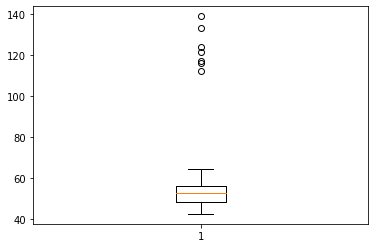

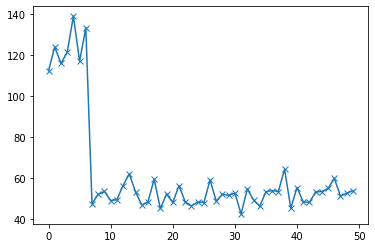

In [19]:
plt.figure(); plt.boxplot(MSE_list_A);
plt.figure(); plt.plot(MSE_list_A,'-x')

In [20]:
mean_A, std_A = np.mean(MSE_list_A, axis=0), np.std(MSE_list_A, axis=0)
print(f'Mean of all mean_squared_error is {mean_A:.2f} and their standard deviation is {std_A:.2f}')

Mean of all mean_squared_error is 61.90 and their standard deviation is 25.37


<a id='item34'></a>


# B. Normalize the data (5 marks)

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.



### Train and Test the Network


In [21]:
X_norm, y = predictors_norm, target

Let's call the function now to create our model.


In [22]:
# build the model
model = regression_model()

In [23]:
MSE_list_B = []
for step in range(50):
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=step)
    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,  verbose=0)
    # evaluate the model
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_list_B.append(MSE)
print(MSE_list_B)

[301.88403327271413, 189.6691287478953, 121.82454921473395, 107.41485788810097, 84.22200520918801, 70.03092544197672, 62.939800009773954, 44.65940176410155, 44.76022824313297, 46.136409642305175, 41.97070518485948, 39.6535808993651, 47.79550993739945, 44.77465020401, 40.17637519085999, 35.007925053594334, 38.615780850639744, 36.310149924552604, 38.13216835612385, 36.82107203106274, 35.50686048966264, 33.24210828027767, 31.380722947858473, 34.349743261766406, 37.4913805536234, 37.738931317217165, 33.784042111390505, 34.329593782487756, 39.301582768393686, 37.80655382477249, 37.11598166655786, 32.896044041544755, 34.27911384674157, 36.04816983043875, 36.756372387659816, 43.27710257896517, 30.040884619088345, 40.277519376721024, 35.06327499906638, 29.615086248084946, 37.437508704120376, 30.690953341108237, 33.73468141097169, 37.27243034990033, 37.13470761288796, 35.997252121585035, 34.243433298159886, 37.170235958088206, 35.311082537723436, 37.258420875684095]


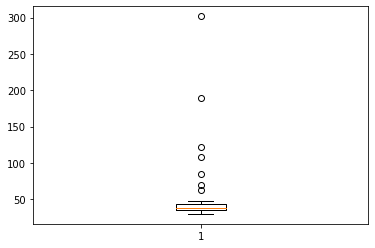

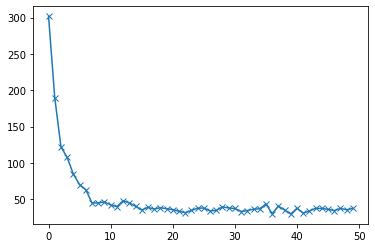

In [24]:
plt.figure();plt.boxplot(MSE_list_B);
plt.figure();plt.plot(MSE_list_B,'-x')

In [25]:
mean_B, std_B = np.mean(MSE_list_B, axis=0), np.std(MSE_list_B, axis=0)
print(f'Mean of all mean_squared_error is {mean_B:.2f} and their standard deviation is {std_B:.2f}')

Mean of all mean_squared_error is 50.79 and their standard deviation is 44.91


In [41]:
print(f'Mean of step B is: {mean_B:.2f} is smaller than mean of step A which is: {mean_A:.2f}')

Mean of step B is: 50.79 is smaller than mean of step A which is: 61.90


<a id='item35'></a>


# C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

### Train and Test the Network


In [26]:
X_norm, y = predictors_norm, target

Let's call the function now to create our model.


In [27]:
# build the model
model = regression_model()

In [28]:
MSE_list_C = []
for step in range(50):
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=step)
    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,  verbose=0)
    # evaluate the model
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_list_C.append(MSE)
print(MSE_list_C)

[145.86513113488996, 106.66633780313347, 54.95879323938911, 47.579902983475726, 45.174599948461925, 46.99289725952582, 49.820266521987165, 36.10298913713772, 38.62788605183789, 37.453388427103526, 40.226142053056236, 36.28338533483811, 43.030106368487424, 44.49049377590291, 35.723186179908026, 30.063124591092492, 37.04267378509756, 36.92295108285346, 36.075353923202144, 37.503458017615486, 34.25228473364911, 32.85242173243249, 30.526513605699346, 32.2770298276866, 34.3486902426638, 38.24047879223245, 32.13138631712938, 32.74161005237469, 37.774122288572805, 36.040779334606, 31.42806503094087, 30.653101826918277, 31.88983655060422, 34.73881330414566, 35.7751565881099, 40.93631614370887, 29.85312577147113, 35.43577609735603, 33.70238148622951, 28.652542838644383, 37.73621447810796, 29.823699043023943, 34.75323482282629, 40.32723134014779, 35.81817462360154, 37.30101636155654, 36.53533877070829, 35.89508566696935, 34.48099210236891, 37.641736926539586]


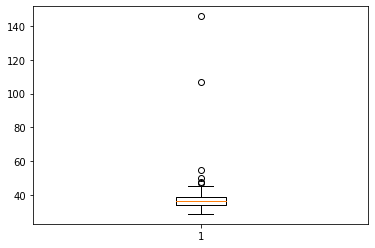

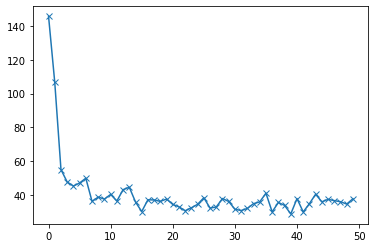

In [29]:
plt.figure();plt.boxplot(MSE_list_C);
plt.figure();plt.plot(MSE_list_C,'-x')

In [30]:
mean_C, std_C = np.mean(MSE_list_C, axis=0), np.std(MSE_list_C, axis=0)
print(f'Mean of all mean_squared_error is {mean_C:.2f} and their standard deviation is {std_C:.2f}')

Mean of all mean_squared_error is 40.42 and their standard deviation is 18.72


In [40]:
print(f'Mean of step C is: {mean_C:.2f} is smaller than mean of step B which is: {mean_B:.2f}')

Mean of step C is: 40.42 is smaller than mean of step B which is: 50.79


<a id='item36'></a>


# D. Increase the number of hidden layers (5 marks)

Repeat part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

### Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [31]:
# define regression model
def regression_model_D():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [32]:
X_norm, y = predictors_norm, target

Let's call the function now to create our model.


In [33]:
# build the model
model = regression_model_D()

In [34]:
MSE_list_D = []
for step in range(50):
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=step)
    # fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,  verbose=0)
    # evaluate the model
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSE_list_D.append(MSE)
print(MSE_list_D)

[120.42587306559798, 116.32020718358588, 68.25905705187093, 49.13173309347419, 44.308982730693096, 42.19585985384273, 46.32536557164491, 35.185334150828204, 39.30371242884916, 40.78945705936761, 33.87371982538738, 30.553910139568202, 42.29859956101621, 38.895015449998, 32.93224167777442, 29.154375995019254, 35.09096672986264, 34.33770543342004, 34.48326531452441, 35.23729620445585, 35.58610844620078, 36.23024327723628, 29.688673270762674, 31.888914087292292, 40.20569358494392, 31.12189198694277, 31.234675266158536, 30.521537056816335, 39.19048020756415, 33.623238871425826, 30.121065710471544, 28.086485245061386, 27.71762314154346, 34.19076606813205, 31.79177773556287, 36.3013368249849, 28.748630631858187, 30.74360204424578, 28.207391098405523, 25.091432895408307, 32.15385466583251, 26.735438096189124, 28.220920612237265, 34.39099558089892, 32.01193408312156, 33.373937618407346, 33.7600056604666, 29.783577419393822, 31.79171362641349, 26.980442754517057]


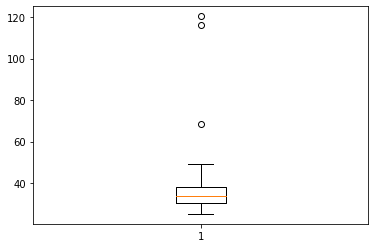

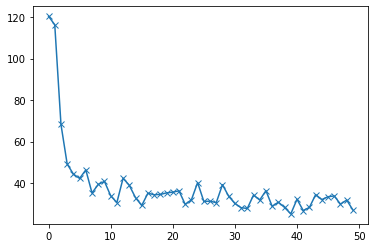

In [35]:
plt.figure();plt.boxplot(MSE_list_D);
plt.figure();plt.plot(MSE_list_D,'-x')

In [36]:
mean_D, std_D = np.mean(MSE_list_D, axis=0), np.std(MSE_list_D, axis=0)
print(f'Mean of all mean_squared_error is {mean_D:.2f} and their standard deviation is {std_D:.2f}')

Mean of all mean_squared_error is 37.97 and their standard deviation is 17.85


In [39]:
print(f'Mean of step D is: {mean_D:.2f} is smaller than mean of step B which is: {mean_B:.2f}')

Mean of step D is: 37.97 is smaller than mean of step B which is: 50.79


<hr>

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


This notebook is part of a course on **Coursera** called _Introduction to Deep Learning & Neural Networks with Keras_. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week3_LAB1).




Copyright © 2019 [IBM Developer Skills Network](https://cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
